In [1]:
import numpy as np
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mticker

import sunpy
import sunpy.coordinates.frames

import helpers

In [2]:
from fig_params import figwidth, fontsize
import matplotlib
matplotlib.rcParams['figure.figsize'] = (2 * figwidth, figwidth)
matplotlib.rcParams['font.size'] = fontsize

Get traced magnetic field footpoints
---

In [3]:
flines, pfss_input, pfss_output = helpers.get_L1_flines()

Computing PFSS...
Tracing field lines...


In [4]:
def solar_feet(obstime):
    # Plot footpoints
    solar_feet = flines.open_field_lines.solar_feet
    solar_feet.representation_type = 'spherical'
    solar_feet = SkyCoord(solar_feet.lon, solar_feet.lat, obstime=obstime, frame='heliographic_carrington')
    return solar_feet

Load de-projected maps
---

In [5]:
fip_map = sunpy.map.Map('maps/carrington_fip_bias.fits')
euv_map = sunpy.map.Map('maps/carrington_intensity.fits')
# Clip off anomolously high values
vmax = 10**3.8
with np.errstate(invalid='ignore'):
    euv_map.data[euv_map.data > vmax] = np.nan

Plot FIP map
---

Text(0, 0.5, 'Si/S FIP bias ratio')

/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


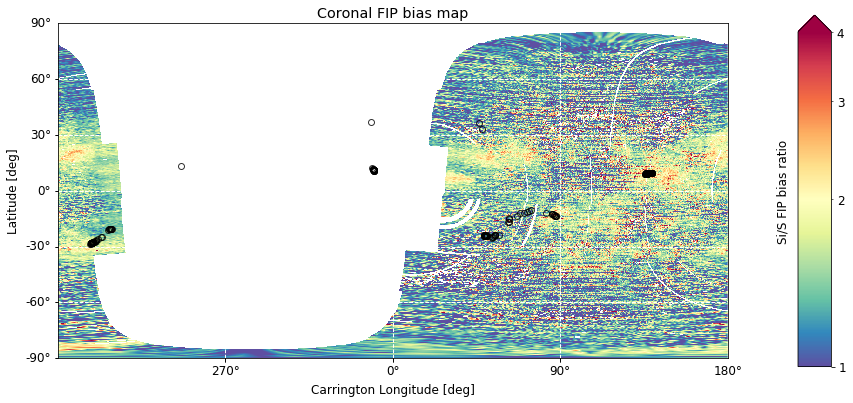

In [11]:
gs = GridSpec(1, 2, width_ratios=[20, 1])
fig = plt.figure()

# Plot map
ax = fig.add_subplot(gs[0, 0], projection=fip_map)
im = fip_map.plot(ax, vmin=1, vmax=4,
                  cmap='Spectral_r', norm=mcolor.LogNorm())
# Plot footpoints
feet = solar_feet(fip_map.date)
ax.plot_coord(feet,
              alpha=0.8, marker='o',
              ms=6, lw=0, mew=1, mec='k',
              fillstyle='none')
ax.set_title('Coronal FIP bias map')
ax.set_xlim(left=0)

# Set grid
lon, lat = ax.coords
grid = {'color': 'w', 'linestyle': '--', 'alpha': 1, 'linewidth': 1}
lon.grid(**grid)
lat.grid(**grid)

# Colourbar axis
ax = fig.add_subplot(gs[0, 1])
fig.colorbar(im, cax=ax, extend='max')
ax.set_aspect(10)
# Set labels
ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_ylabel('Si/S FIP bias ratio', labelpad=-70)

In [12]:
# Save figure
fig.savefig('carr_fip.pdf', bbox_inches='tight')

/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


Text(0, 0.5, 'erg cm$^{−2}$ s$^{−1}$ sr$^{−1}$ A$^{−1}$')

/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


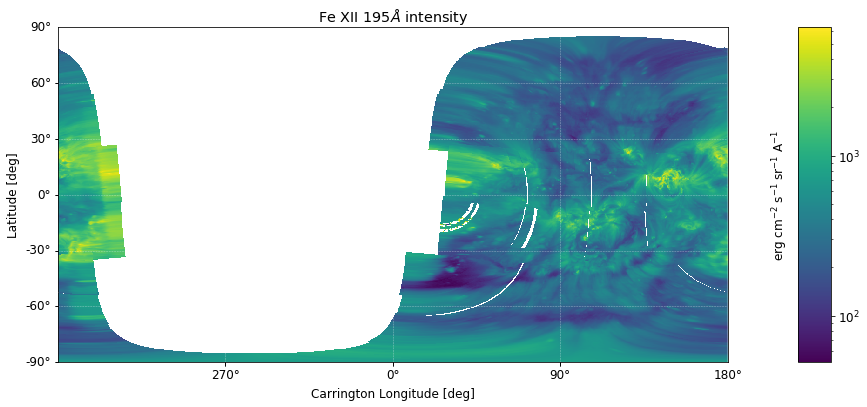

In [8]:
gs = GridSpec(1, 2, width_ratios=[20, 1])
fig = plt.figure()

# Plot map
ax = fig.add_subplot(gs[0, 0], projection=euv_map)
im = euv_map.plot(ax, cmap='viridis', norm=mcolor.LogNorm())
    
# Formatting
ax.set_title('Fe XII 195$\AA$ intensity')
ax.set_xlim(left=0)

# Set grid
lon, lat = ax.coords
grid = {'color': 'w', 'linestyle': '--', 'alpha': 0.5}
lon.grid(**grid)
lat.grid(**grid)

# Colourbar axis
ax = fig.add_subplot(gs[0, 1])
fig.colorbar(im, cax=ax)
ax.set_aspect(10)

# Set labels
ax.set_ylabel('erg cm$^{−2}$ s$^{−1}$ sr$^{−1}$ A$^{−1}$', labelpad=-90)

In [9]:
fig.savefig('carr_hionde_intensity.pdf', bbox_inches='tight')

/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
